In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from scipy.io import loadmat
import pandas as pd

mat = loadmat('data_hw5_3.mat')['R']

data = pd.DataFrame(mat, columns=None)

### Problem 8A: Decision Tree and Regions
Below is a sample decision tree that would yield a good classification result for the data from Problem 7, and the regions that this decision tree splits the data into.

![title](decision_tree.png)

![title](decision_regions.png)

### Problem 8B: Bagging Technique

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


Text(0.5, 1.0, 'X1 vs X2, colors indicate class')

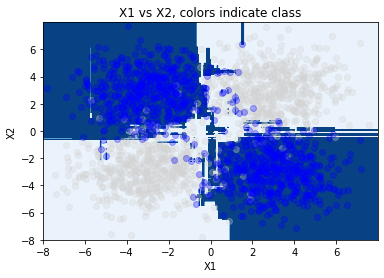

In [5]:
X = data[[0, 1]]
y = data[[2]]

# Construct bagging classifier with 10 estimators
clf = BaggingClassifier(n_estimators=10).fit(X, np.ravel(y))

# Plot the decision boundary

x_min, x_max = -8, 8
y_min, y_max = -8, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.xlabel('X1')
plt.ylabel('X2')
plt.axis("tight")

class1 = data[data[2]==1]
class2 = data[data[2]==2]

plt.scatter(class1[0], class1[1], color='lightgray', alpha = 0.3)
plt.scatter(class2[0], class2[1], color='b', alpha = 0.3)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2, colors indicate class')

### Problem 8C: Discussion
The above techniques differ in terms of their complexity. The decision tree classifier uses only a single decision tree to classify data, which therefore results in 4 different regions on the plot that datapoints could fall into. However, the bagging technique instead constructs 10 trees, each constructed from a random bootstrapped subset of the original dataset. In order to classify datapoints, the bagging technique gets the predicted class from each individual decision tree, and then ultimately chooses whichever class that the most trees picked as their decision. Because each tree was constructed randomly, they are all slightly different, and therefore have more complexity than the simple single decision tree model. Their predictions fall into more than just 4 regions on the graph of data; there are 4 main regions, but there are also a number of smaller regions that contain only a few data points. The bagging model may be slightly overfit to the data; the overall trend in the data can be explained fairly well with only the single decision tree.

##### 